# Ultimate Pig - An Analysis of Play Styles

#### The purpose of this exercise is to analyze three different styles of play for Pig Solitaire. This is accomplished through use of three Python Objects representing the play styles. The resulting data was culled from a number of simulations for each of the three playstyles.

The three play styles are:
1. 'Basic' - This player type will roll the die one time and one time only. This player quits ("holds") after the first roll.
2. 'Random' - This player type will choose randomly between rolling the die again after the first roll and for each subsequent turn.
3. 'Gambler' - This player type refuses to hold and will always roll until he rolls a one, thus ending the game, or he has made seven rolls and the game is over.

The rules of Pig Solitaire are:
>In 7 turns, you are attempting to get the highest score possible. 
>Each turn, you have two choices:

>Roll. Roll a six-sided die. If it comes up one, your turn is over and you add nothing to your score. If it comes up two through six, you add that number to your turn total and choose again.
>Hold. If you hold, you add the turn total to your score.

## Basic Code:

In [42]:
%matplotlib inline
import random
import math
import statistics as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn

ImportError: No module named 'seaborn'

In [25]:
class Player:

    def __init__(self, personality):
        self.personality = personality #my idea being that the personality aspect determines how they play game below

    def roll_a_die(self):
        return random.randint(1, 6)

    def roll_again(self):
        return False


    # def turn_decision(self):
    #     if self.personality

    def turn(self):
        roll_results_list = []
        roll_number = 1
        while roll_number < 7:
            roll = self.roll_a_die()
            if roll == 1:
                roll_results_list = [0]
                # print('You rolled a one, end of turn. You rolled {} times.'.format(roll_number))
                return sum(roll_results_list)
            else:
                roll_results_list.append(roll)
                roll_or_hold = self.roll_again()
                if roll_or_hold == False:
                    # print('You choose not to roll. Your score is {} in {} turns'.format(sum(roll_results_list), roll_number))
                    return sum(roll_results_list)
                else:
                    roll_number += 1
                    roll_results_list.append(roll)
                    continue
        # print('The game is over. Your score is {} in {} turns.'.format(sum(roll_results_list), roll_number))
        return sum(roll_results_list)

In [26]:
class RandomPlayer(Player):

    def __init__(self, personality):
        self.personality = personality

    def roll_again(self):
        return random.choice([True, False])

In [27]:
class GamblerPlayer(Player):

    def __init__(self, personality):
        self.personality = personality

    def roll_again(self):
        return True

In [36]:
trial_results = []
for _ in range(50):
    player = Player('basic')
    trial_results.append(player.turn())

In [37]:
print(trial_results)

[4, 6, 5, 2, 5, 3, 4, 6, 0, 6, 2, 3, 6, 5, 3, 0, 5, 6, 5, 4, 3, 2, 6, 2, 2, 2, 6, 4, 6, 6, 0, 0, 5, 2, 2, 5, 4, 4, 0, 0, 4, 6, 3, 0, 2, 0, 4, 3, 0, 3]


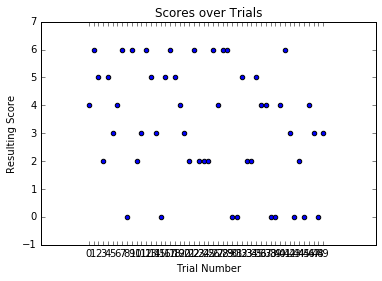

In [40]:
x1 = range(len(trial_results))
y1 = trial_results
plt.scatter(range(len(trial_results)), y1)
plt.xticks(range(len(trial_results)), x1)
plt.xlabel("Trial Number")
plt.ylabel("Resulting Score")
plt.title("Scores over Trials")
plt.show()